In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
df = pd.read_csv('demo.csv')

# Display the first few rows of the dataframe
print(df.head())

# Separate out the numeric columns for scaling
numeric_cols = ['father_income', 'mother_income', 'child_income']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the standardized DataFrame
print(df.head())


   father_income  mother_income  child_income loan_approved
0          65000          50000         30000           yes
1          58000          42000         24000            no
2          72000          55000         32000           yes
3          49000          36000         19000           yes
4          60000          45000         25000            no
   father_income  mother_income  child_income loan_approved
0       0.524725       0.771168      1.087435           yes
1      -0.276040      -0.421226     -0.211838            no
2       1.325489       1.516414      1.520526           yes
3      -1.305595      -1.315522     -1.294566           yes
4      -0.047250       0.025922      0.004708            no


In [11]:
from sklearn.decomposition import PCA

# Separate features (numeric columns only)
X = df[['father_income', 'mother_income', 'child_income']]

# Initialize PCA with 3 components (full dimensionality)
pca = PCA(n_components=3)

# Fit PCA on the standardized data
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Display the transformed DataFrame
print(principal_df.head())


        PC1       PC2       PC3
0 -1.375851  0.396411 -0.049431
1  0.525008  0.072765  0.132577
2 -2.518664  0.121459 -0.100062
3  2.260732  0.008981  0.009132
4  0.009577  0.028421 -0.045024


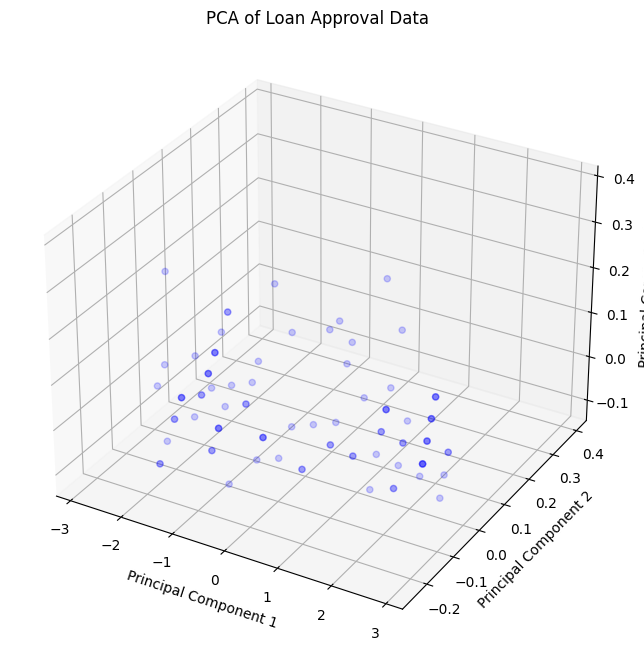

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the principal components
ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c='blue', marker='o', alpha=0.2)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Loan Approval Data')

# Show plot
plt.show()


In [13]:
import plotly.express as px

# Scatter plot of PC1 vs PC2
fig = px.scatter(principal_df, x='PC1', y='PC2', title='PCA: PC1 vs PC2')

# Update marker size and style
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Show plot
fig.show()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



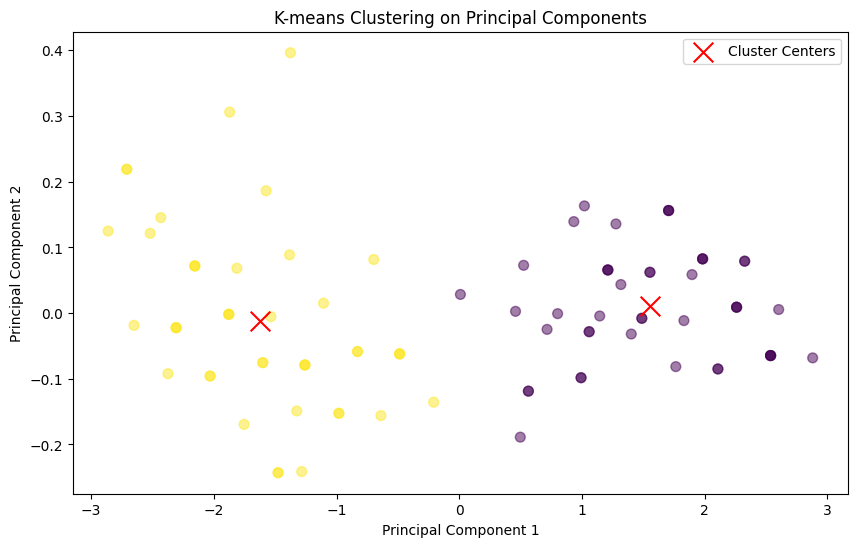

In [14]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Fit K-means to the principal components
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(principal_df)

# Predict clusters
clusters = kmeans.predict(principal_df)

# Plot the data points with cluster centers
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Cluster Centers')
plt.title('K-means Clustering on Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
